# About this Kernel
Titanic is the most damaging cruise ship disaster in human history with more than 1,500 deaths out of 2,224 passengers aboard on April 10, 1912.  With data for this accident from ​Kaggle​, this reports will be divided into 3 main parts:

#### Part 1: EDA regarding age: 
- Explore a plausible age range of survivors and non-survivors. A statistical and practical significance test is also carried out to determine whether females who survived tended to be younger than females who did not survive. 

#### Part 2: Cleaning data & Holistic EDA on other factors other than age.

#### Part 3: Build different models to predict the survival status of Titanic passengers.
- Losgistic regression 
- TBU - Random Forest

In [72]:

import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


In [2]:
train.isnull().sum() #Find number of rows with missing data of each variable


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
train.head() #present to dataset 


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
train.shape #number of cells and columns that include data


(891, 12)

## Part 1

In [22]:
#Create a data frame for the age of survivors and explore the data
import pandas as pd
df = pd.read_csv('train.csv') #read train.csv
df.dropna(inplace= True, subset = ['Age']) #Eliminate cells with missing data in subset 'Age' and replace them with "True"

survival_age = df['Age'][df['Survived']== 1] #Construct data frame for the age of people who survived

h = df['Age'][df['Survived'] == 1].mean() #Calculate the mean age of Titanic survivors
m =df['Age'][df['Survived'] == 1].std() #Calculate the SD in age of survivors
l = df['Age'][df['Survived'] == 1].median() #Calculate median in age of survivors

print('Total number of survivors:',len(df['Age'][df['Survived'] == 1])) #Count the total number of survivors with available age 
print('The mean age of Titanic survivors:',round(h,2)) 
print('The SD in age of Titanic survivors:',round(m,2)) 
print('The median in age of Titanic survivors:',round(l,2)) 



Total number of survivors: 290
The mean age of Titanic survivors: 28.34
The SD in age of Titanic survivors: 14.95
The median in age of Titanic survivors: 28.0


In [23]:
#Create a data frame for the age of non-survivors and explore the data

df = pd.read_csv('train.csv')
df.dropna(inplace= True, subset = ['Age']) #Eliminate cells with missing data in subset 'Age' and replace them with "True"

nonsurvival_age = df['Age'][df['Survived']== 0] #Construct data frame for the age of people who didn't survive 
#print('Passenger|age',"\n",nonsurvival_age)
print('Total number of non-survivors:',len(df['Age'][df['Survived'] == 0])) #Count number of nonsurvivors with available age 

a = df['Age'][df['Survived'] == 0].mean() #Calculate the mean age of non-survivors
b = df['Age'][df['Survived'] == 0].std() #Calculate the SD in age of non-survivors
c = df['Age'][df['Survived'] == 0].median() #Calculate the median in age of non-survivors

print('The mean age of Titanic non-survivors:',round (a,2)) 
print('The SD in age of Titanic non-survivors:',round (b,2)) 
print('The median in age of Titanic non-survivors:',round (c,2)) 


Total number of non-survivors: 424
The mean age of Titanic non-survivors: 30.63
The SD in age of Titanic non-survivors: 14.17
The median in age of Titanic non-survivors: 28.0


Text(0.5,1,'Non-survivors age distribution')

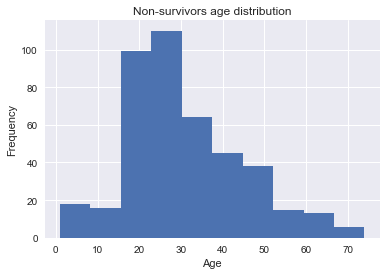

In [7]:

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots
df.dropna(inplace= True, subset = ['Age'])

df['Age'][df['Survived'] == 0].hist() #Demand to create a histogram for the age distribution of non-survivors
plt.xlabel('Age') #label x-axis
plt.ylabel('Frequency') #label y-axis
plt.title('Non-survivors age distribution') #Title of the histogram




Text(0.5,1,'Survivors age distribution')

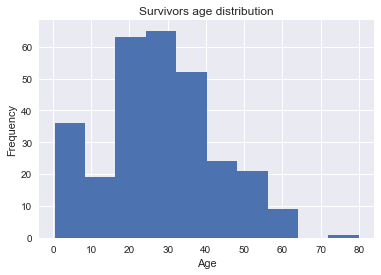

In [8]:
df.dropna(inplace= True, subset = ['Age'])
df['Age'][df['Survived'] == 1].hist() #create a histogram
plt.xlabel('Age') #label x-axis
plt.ylabel('Frequency') #label y-axis
plt.title('Survivors age distribution') #label the title


In [9]:
#Calculate confidence interval of Survivors' age

from scipy.stats import sem #import standard error function from scipy.stats
from scipy.stats import t #import t-statistic function from scipy.stats
from scipy import mean #import mean function from scipy

confidence = 0.95 #set confidence level at 95%
data_survivor = list(df['Age'][df['Survived'] == 1]) #make a list of the age of survivors

n = len(data_survivor) #number of values in the list data_survivor
m = mean(data_survivor) #to find the average age
std_err = sem(data_survivor) #to find the standard error
h = std_err * t.ppf((1 + confidence) / 2, n - 1) #to find the margin of error

low_1 = m - h #lower bound of the confidence interval for survivors' age
up_1 = m + h #Upper bound of the confidence interval for survivors' age

print ('The lower bound:', low_1)
print ('The upper bound:', up_1)
print ('95% confidence interval of survivors age:','[',low_1,',', up_1,']')


The lower bound: 26.615702558057876
The upper bound: 30.071676752286955
95% confidence interval of survivors age: [ 26.615702558057876 , 30.071676752286955 ]


In [10]:
#Calculate confidence interval of Non-survivors' age

from scipy.stats import sem #import standard error function from scipy.stats
from scipy.stats import t #import t-statistic function from scipy.stats
from scipy import mean #import mean function from scipy

confidence = 0.95 #set confidence level at 95%
data_nonsurvivor = list(df['Age'][df['Survived'] == 0]) #make a list of the age of nonsurvivors

n = len(data_nonsurvivor) #to find number of values in the list data_nosurvivor
m = mean(data_nonsurvivor) #to find the average age of non-survivors
std_err = sem(data_nonsurvivor) #to find the standard error
h = std_err * t.ppf((1 + confidence) / 2, n - 1) #to find the margin of error

low_2 = m - h #lower bound of the confidence interval for survivors' age
up_2 = m + h #Upper bound of the confidence interval for survivors' age

print ('The lower bound:', low_1)
print ('The upper bound:', up_1)
print ('95% confidence interval of Non-survivors age:','[',low_2,',', up_2,']')

The lower bound: 26.615702558057876
The upper bound: 30.071676752286955
95% confidence interval of Non-survivors age: [ 29.273346601078806 , 31.979011889487232 ]


In [11]:
train['Survived'].value_counts()


0    549
1    342
Name: Survived, dtype: int64

In [24]:
import pandas as pd
df = pd.read_csv('train.csv') #read train.csv
df.dropna(inplace= True, subset = ['Age']) #Eliminate cells with missing data in subset 'Age' and replace them with "True"

female_survived = df['Age'][(df['Survived']== 1)&(df['Sex']== 'female')] #make a list of age values of female survivors

#print(female_survived)
print('Number of female survivors:',len(female_survived)) 
print('Mean age of female survivors:',round(df['Age'][(df['Survived']== 1)&(df['Sex']== 'female')].mean(),2)  )
print('SD in age of female survivors:',round(df['Age'][(df['Survived']== 1)&(df['Sex']== 'female')].std(),2) )

Number of female survivors: 197
Mean age of female survivors: 28.85
SD in age of female survivors: 14.18


In [25]:
import pandas as pd
df = pd.read_csv('train.csv') #read train.csv
df.dropna(inplace= True, subset = ['Age']) #Eliminate cells with missing data in subset 'Age' and replace them with "True"

female_nosurvived = df['Age'][(df['Survived']== 0)&(df['Sex']== 'female')] #make a list of age values of female non-survivors

#print(female_nosurvived)
print('Number of female non-survivors:',len(female_nosurvived))
print('Mean age of female non-survivors:',round(df['Age'][(df['Survived']== 0)&(df['Sex']== 'female')].mean(),2))
print('SD in age of female non-survivors:',round(df['Age'][(df['Survived']== 0)&(df['Sex']== 'female')].std(),2))

Number of female non-survivors: 64
Mean age of female non-survivors: 25.05
SD in age of female non-survivors: 13.62


Text(0.5,1,'Female survivors age distribution')

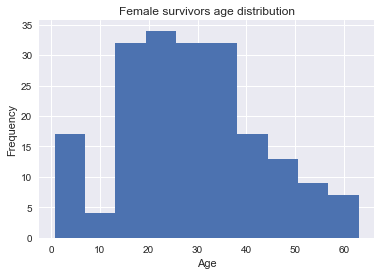

In [14]:
#Create the histogram for sub-group of female survivors

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots
df.dropna(inplace= True, subset = ['Age'])

df['Age'][(df['Survived']== 1)&(df['Sex']== 'female')].hist() #compute histogram for the age of female survivors
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Female survivors age distribution')




Text(0.5,1,'Female non-survivors age distribution')

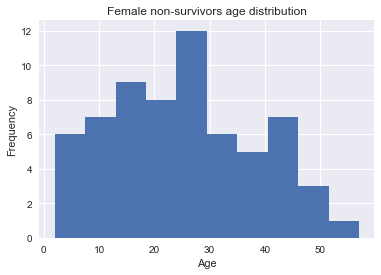

In [15]:
#Create the histogram for sub-group of female nonsurvivors

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots
df.dropna(inplace= True, subset = ['Age'])

df['Age'][(df['Survived']== 0)&(df['Sex']== 'female')].hist() #compute histogram for the age of female nonsurvivors
plt.xlabel('Age') #label x-axis
plt.ylabel('Frequency') #label y-axis
plt.title('Female non-survivors age distribution') #title of the histogram




In [16]:
#Code for hypothesis test for difference between two means:

n1=197 #sample size of female survivors
n2=64 #sample size of female nonsurvivors
x1=28.85 #mean age of female survivors
x2=25.05  #mean age of female nonsurvivors
s1=14.18  #SD in age of female survivors
s2=13.62  #SD age of female nonsurvivors

SE = ((s1**2/n1) + (s2**2/n2))**0.5 #formula for SE in hypothesis test for difference between means

DF = (s1**2/n1 + s2**2/n2)**2 / (((s1**2 / n1)**2 / (n1 - 1)) +  ((s2**2 / n2)*2 / (n2 - 1))) 
#conservative formula for DF in hypothesis test for difference between means

t = (x1 - x2) / SE # formula for t-value in hypothesis test for difference between means


print('SE:',round(SE,2)) #print out SE, round to the second decimal
print('DF:',round(DF,0)) #print out DF  as integer
print('t-statistics:',round(t,2)) #print out t-value, round to the second decimal


SE: 1.98
DF: 158.0
t-statistics: 1.92


In [17]:
#Code for effect size Hedge's g
x1=28.85 #mean age of female survivors
x2=25.05  #mean age of female nonsurvivors
s1=14.18  #SD in age of female survivors
s2=13.62  #SD age of female nonsurvivors
SDpooled = ((s1**2+s2**2)/2)**0.5
Hedges_g = (x1-x2)/SDpooled

print('Hedges g:',round(Hedges_g,2))

Hedges g: 0.27


## Part 2


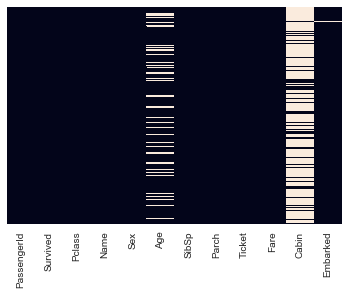

In [28]:
#Heatmap to see where the null is - Age and Cabin

sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

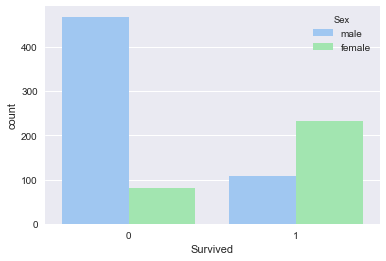

In [35]:
sns.countplot(x='Survived', data=train, hue='Sex', palette='pastel')

#Less survivors than non-survivors
#It seems like people who did survive are more likely to be females

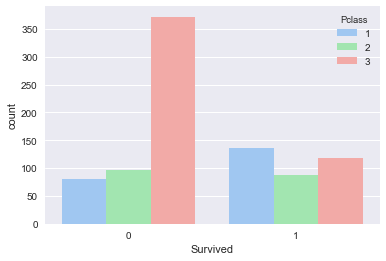

In [36]:
sns.countplot(x='Survived', hue='Pclass', data=train, palette='pastel')

#people who died were more likely to be in class 3

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

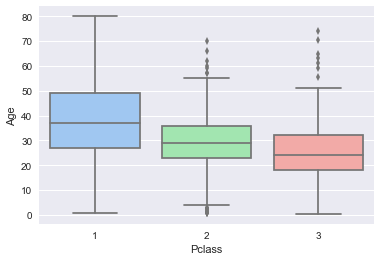

In [49]:
import seaborn as sns
sns.boxplot(x='Pclass', y='Age', data=train, palette='pastel')
#To visualize the mean age of people of class 1-2
train.groupby('Pclass')['Age'].mean()

In [73]:
#Replace null age values with mean age according to different class


def transform_na(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 38.233441

        elif Pclass == 2:
            return 29.877630

        else:
            return 25.140620

    else:
        return Age

In [74]:
train['Age'] = train[['Age','Pclass']].apply(transform_na,axis=1)

In [75]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [76]:
train.dropna(inplace=True)

In [77]:
train.drop(['Cabin', 'Name', 'PassengerId'], axis=1, inplace=True)

#Drop these unnecessary cols 

In [88]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
#Create dummy variables for sex 

In [79]:
train.drop(['Ticket','Embarked'], axis=1, inplace=True)

In [92]:
train = pd.concat([train,sex],axis=1) #Combine new numeric col for sex with the train df
train.drop('Sex', axis=1,inplace=True)

## Part 3.1: Build Predictive model - Logistic regression

#### Train split test

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X = train.drop('Survived', axis =1)
y = train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

In [98]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,male,male,male
1,1,1,38.0,1,0,71.2833,0,0,0,0
3,1,1,35.0,1,0,53.1000,0,0,0,0
6,0,1,54.0,0,0,51.8625,1,1,1,1
10,1,3,4.0,1,1,16.7000,0,0,0,0
11,1,1,58.0,0,0,26.5500,0,0,0,0


#### Fit logistic regression model

In [100]:
from sklearn.linear_model import LogisticRegression

In [101]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [102]:
y_predictions = logmodel.predict(X_test)

#### Evaluate model

In [103]:
from sklearn import metrics

In [104]:
print('The accuracy score is: {}'.format(round(metrics.accuracy_score(y_predictions, y_test),4)))

The accuracy score is: 0.7705


In [106]:
print(metrics.classification_report(y_test,y_predictions))

             precision    recall  f1-score   support

          0       0.64      0.76      0.70        21
          1       0.86      0.78      0.82        40

avg / total       0.78      0.77      0.77        61



In [108]:
metrics.confusion_matrix(y_test,y_predictions)

array([[16,  5],
       [ 9, 31]], dtype=int64)

#### Draw ROC curve
- ROC curve tells the trade-off between sensitivity and specificity with the closer the curve to the left-hand border meaning more accurate the test.



ROC= 0.8357142857142857


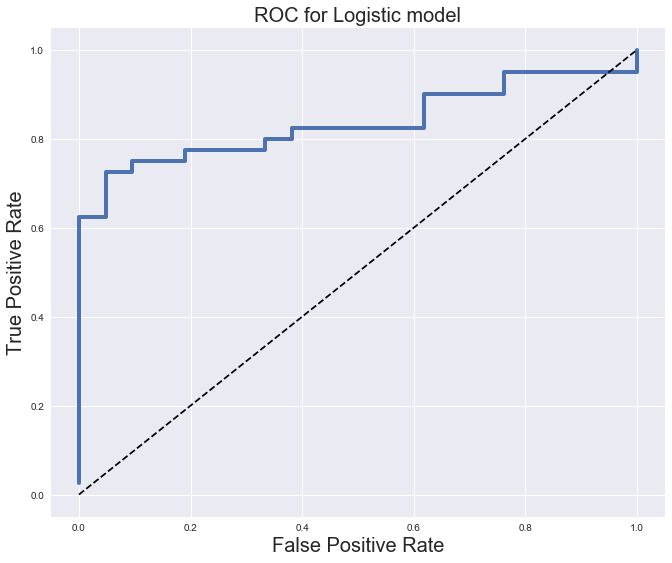

In [112]:
from sklearn.metrics import roc_curve, auc

y_score = logmodel.decision_function(X_test)
FPR, TPR, _ = roc_curve(y_test, y_score)
roc_val = auc(FPR, TPR)
print ('ROC=',roc_val)

plt.figure(figsize =[11,9])
plt.plot(FPR, TPR, label= 'ROC curve(area = %0.2f)'%roc_val, linewidth= 4)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)
plt.title('ROC for Logistic model',fontsize=20)
plt.show()